<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/vanishing_gradient_ReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state =42)

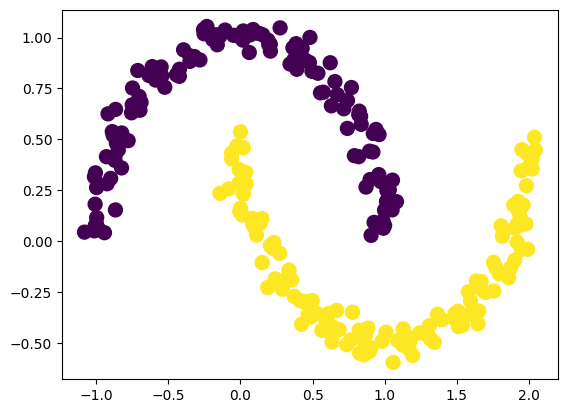

In [3]:
plt.scatter(X[:,0],X[:,1],c=y, s=100)
plt.show()

In [4]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim =2))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.get_weights()

[array([[-0.49941993,  0.62157077,  0.52574724, -0.00862277, -0.39700982,
         -0.6444283 , -0.5000081 ,  0.53467125,  0.41706246, -0.5170194 ],
        [ 0.45029253, -0.07321382, -0.3170011 , -0.21168828, -0.17228991,
          0.63035697,  0.66705257,  0.4339295 ,  0.18762124, -0.03498626]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.35837942, -0.04548222, -0.3904847 , -0.39807534, -0.16049421,
         -0.1631493 ,  0.45571315,  0.1386925 ,  0.11116683,  0.12290794],
        [ 0.21021569, -0.52035904,  0.1509543 , -0.09303153, -0.08806491,
          0.4389246 , -0.23044887, -0.24082714,  0.44498098, -0.07088536],
        [ 0.2257117 , -0.01162893,  0.25632054,  0.35494763, -0.3919995 ,
         -0.08422107,  0.4446242 , -0.48453024, -0.33590353, -0.3323499 ],
        [ 0.07009792, -0.0139454 ,  0.53294253, -0.22493717,  0.48612475,
         -0.16475904,  0.38811457, -0.00908679,  0.48946118, -0.3020812 ],
        [-0.03877

In [8]:
old_weights= model.get_weights()[0]

In [9]:
old_weights

array([[-0.49941993,  0.62157077,  0.52574724, -0.00862277, -0.39700982,
        -0.6444283 , -0.5000081 ,  0.53467125,  0.41706246, -0.5170194 ],
       [ 0.45029253, -0.07321382, -0.3170011 , -0.21168828, -0.17228991,
         0.63035697,  0.66705257,  0.4339295 ,  0.18762124, -0.03498626]],
      dtype=float32)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [11]:
#model.fit(X_train,y_train,epochs=1)
#########################################
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 7s 16ms/step - loss: 0.6922 - accuracy: 0.4950
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6883 - accuracy: 0.6900
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6831 - accuracy: 0.6100
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6741 - accuracy: 0.7450
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6599 - accuracy: 0.7950
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6417 - accuracy: 0.7900
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6183 - accuracy: 0.8100
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5874 - accuracy: 0.8050
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5573 - accuracy: 0.8150
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5253 - accuracy: 0.8200
Epoch 11/100
7/7 [====

In [12]:
new_weights = model.get_weights()[0]

In [13]:
model.optimizer.get_config()['learning_rate']

0.001

In [14]:
gradient = (old_weights - new_weights)/0.001

percent_change = abs(100*(old_weights - new_weights)/old_weights)

In [15]:
gradient

array([[  43.020603 ,  -52.87456  ,  -42.909203 , -108.72932  ,
         133.33453  ,  -35.61568  ,   25.339363 ,  -27.590096 ,
         -75.12703  ,  185.8304   ],
       [-108.67464  ,   66.56283  ,   52.899208 ,   92.22525  ,
         -38.19856  ,   84.28668  ,   -2.8504727, -108.70349  ,
          60.331802 ,  -75.764595 ]], dtype=float32)

In [16]:
percent_change

array([[8.61411476e+00, 8.50660419e+00, 8.16156483e+00, 1.26095654e+03,
        3.35846977e+01, 5.52670956e+00, 5.06779099e+00, 5.16019821e+00,
        1.80133762e+01, 3.59426422e+01],
       [2.41342316e+01, 9.09156723e+01, 1.66873913e+01, 4.35665398e+01,
        2.21710968e+01, 1.33712635e+01, 4.27323580e-01, 2.50509586e+01,
        3.21561737e+01, 2.16555313e+02]], dtype=float32)

In [17]:
old_weights

array([[-0.49941993,  0.62157077,  0.52574724, -0.00862277, -0.39700982,
        -0.6444283 , -0.5000081 ,  0.53467125,  0.41706246, -0.5170194 ],
       [ 0.45029253, -0.07321382, -0.3170011 , -0.21168828, -0.17228991,
         0.63035697,  0.66705257,  0.4339295 ,  0.18762124, -0.03498626]],
      dtype=float32)

In [18]:
new_weights

array([[-0.54244053,  0.67444533,  0.56865644,  0.10010656, -0.53034437,
        -0.60881263, -0.5253475 ,  0.56226134,  0.4921895 , -0.7028498 ],
       [ 0.5589672 , -0.13977665, -0.36990032, -0.30391353, -0.13409135,
         0.5460703 ,  0.66990304,  0.542633  ,  0.12728943,  0.04077834]],
      dtype=float32)